In [2]:
#import Module
import cv2 
import matplotlib.pyplot as plt

In [3]:
#import model ที่ training เรียบร้อยแล้ว
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb' # model ที่ train
# ตัวแปล model เก็บค่า
model = cv2.dnn_DetectionModel(frozen_model,config_file)

In [4]:
#สร้างตัวแปรว่างๆ ไว้รับค่าจาก Labels
classLabels = []
file_labels = 'Labels.txt'

In [5]:
#เปิดไฟล์แล้วแต่ง String สักหน่อยให้อยู่ในรูปแบบ List
with open(file_labels,'rt') as fpt:   #เปิดไฟล์ด้วย read write
    classLabels = fpt.read().rstrip('\n').split('\n')
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [6]:
#กำหนดขนาดของ Input 
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5, 127.5, 127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 0000014C46402F30>

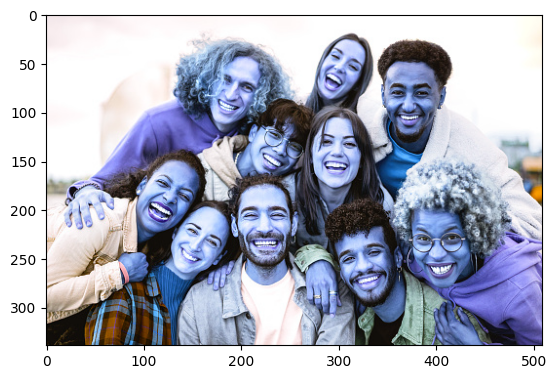

In [7]:
#เปิดภาพดู
# img = cv2.imread('view_car_and_people.jpg')
img = cv2.imread('people.jpg')
# img = cv2.imread('dog.jpg')
# img = cv2.imread('pig.jpg')
# img = cv2.imread('tiger.jpg')
# img = cv2.imread('vehicle.jpg')
# img = cv2.imread('airplane.jpg')
plt.imshow(img)

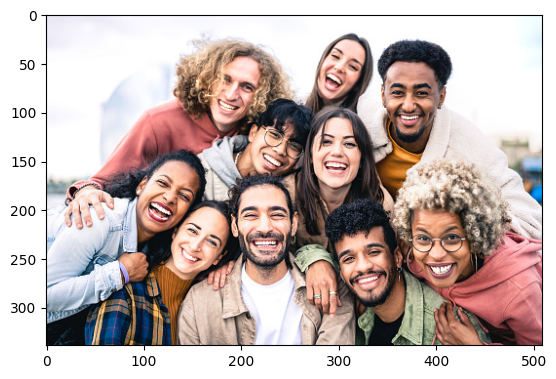

In [8]:
#เปิดภาพใส่สีให้ปกติ
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [9]:
#สร้างตัวแปรมารับค่าจาก model ที่ train เรียบร้อยแล้ว #confThreshold คือการปรับค่าสี
ClassIndex, confidece, bbox = model.detect(img, confThreshold = 0.5)
print(ClassIndex-1)

[0 0 0 0 0 0 0 0]


In [10]:
#สร้างกรอบรอบวัตถุกับใส่ตัวหนังสือ สีแบบ BGR
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
colorBox = (255,0,0)
colorFont = (0,255,0)
# สร้าง loop สำหรับ detect ภาพที่เจอใน 1 frame
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
    cv2.rectangle(img, boxes, colorBox)
    cv2.putText(img, classLabels[ClassInd-1], (boxes[0]+10,boxes[1]+40),font,font_scale,colorFont,thickness=3)

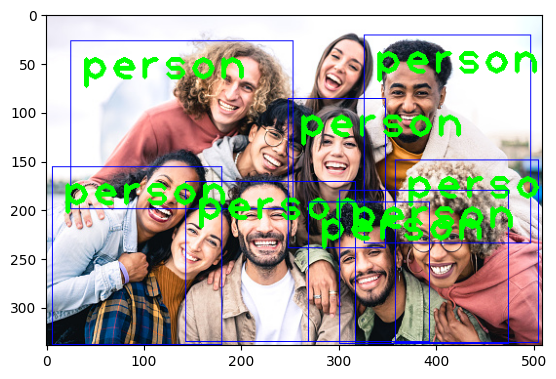

In [11]:
#เสร็จสำหรับรูปภาพ
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

## Video Dectection

In [12]:
# เปิด file video 
video = 'Cargo_Ramp.mp4'
cap = cv2.VideoCapture(video)

#เช็ค Video เปิดได้ไหม
# กรณีเปิด video ไม่ได้
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError('Cannot Open video')

# กรณีเปิด video ได้
while True:
    ret, frame = cap.read()
    ClassIndex, confidece, bbox = model.detect(frame, confThreshold = 0.5)
    
    if(len(ClassIndex) != 0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
            if(ClassInd <= 80):
                cv2.rectangle(frame,boxes,colorBox)
                cv2.putText(frame, classLabels[ClassInd-1], (boxes[0]+10,boxes[1]+40), font, font_scale, colorFont, thickness=3)
    cv2.imshow('Hello Demo Video',frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows

<function destroyAllWindows>

: 